In [1]:
# Import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from Library.sb_utils import save_file

In [2]:
pd.options.display.max_columns = 1000

In [3]:
# Import learning modules
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
# Read file
df = pd.read_csv('Data/Written_essay_scores_cleaned_melted.csv')

In [5]:
df.head()

,Code,Content (/12),Organization (/12),Vocabulary (/12),Language Use (/12),Mechanics (/12),Total 1 (%),Total 2 (Weighted %),PTJ1 (wds),SMK1 (wds),Sex,Age,Grade/Degree,VST,INTM,INSM,INTM+INSM,INTM-INSM,Primary,Secondary,College,Inschool,Outschool,Listening,Reading,Speaking,Writing,NS,Pronunciation,Presentation,EssayW,CEE,TOEIC,ONET,CEE_isna,ONET_isna,TOEIC_isna,CHN,HKG,IDN,JPN,KOR,PAK,PHL,SIN,THA,TWN,Humanities,Life Sciences,Other Fields,Sciences & Technology,Social Sciences,A2_0,B1_1,B1_2,B2_0
0,W_CHN_001,9.5,8.0,8.0,6.5,8.0,66.65,64.55,271,219,0,20,2.0,30.0,0.00,0.00,0.00,0.00,2.0,3.63,4.25,3.89,3.56,4.00,4.50,3.50,3.75,4.0,5.0,5.0,4.0,72.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,W_CHN_002,9.0,8.5,9.0,8.0,9.0,72.50,68.75,203,292,0,21,3.0,27.0,4.17,4.33,8.50,-0.16,2.5,4.00,1.86,3.00,2.88,3.00,3.00,2.75,3.33,3.0,3.0,3.0,3.0,77.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,W_CHN_003,9.0,8.5,8.0,8.5,8.0,70.00,67.55,238,250,0,20,3.0,32.0,5.17,5.17,10.34,0.00,3.5,4.25,4.25,4.22,4.11,5.00,4.00,3.75,4.25,4.0,5.0,5.0,5.0,79.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,W_CHN_004,8.5,9.0,7.5,8.5,9.5,71.70,66.90,269,230,0,20,2.0,37.0,4.67,5.17,9.84,-0.50,1.0,2.75,4.25,3.44,3.00,3.75,3.75,3.25,3.25,3.0,5.0,5.0,5.0,87.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,W_CHN_005,9.5,8.5,9.5,10.0,8.5,76.65,73.95,225,208,1,20,2.0,44.0,5.17,5.33,10.50,-0.16,2.0,3.63,4.88,4.33,3.67,5.00,5.00,3.25,3.75,3.0,5.0,5.0,5.0,84.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df.columns

Index(['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)',
       'Total 2 (Weighted %)', 'PTJ1 (wds)', 'SMK1 (wds)', 'Sex', 'Age',
       'Grade/Degree', 'VST', 'INTM', 'INSM', 'INTM+INSM', 'INTM-INSM',
       'Primary', 'Secondary', 'College', 'Inschool', 'Outschool', 'Listening',
       'Reading', 'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation',
       'EssayW', 'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna', 'TOEIC_isna',
       'CHN', 'HKG', 'IDN', 'JPN', 'KOR', 'PAK', 'PHL', 'SIN', 'THA', 'TWN',
       'Humanities', 'Life Sciences', 'Other Fields', 'Sciences & Technology',
       'Social Sciences', 'A2_0', 'B1_1', 'B1_2', 'B2_0'],
      dtype='object')

In [7]:
# Motivations scores highly correlated and redundant. Keep just one. Weighted total is a competing target variable. Drop that one too
df = df.drop(['INTM', 'INSM', 'INTM-INSM', 'Total 2 (Weighted %)'], axis=1)

In [8]:
df.dtypes

Code                      object
Content (/12)            float64
Organization (/12)       float64
Vocabulary (/12)         float64
Language Use (/12)       float64
Mechanics (/12)          float64
Total 1 (%)              float64
PTJ1 (wds)                 int64
SMK1 (wds)                 int64
Sex                        int64
Age                        int64
Grade/Degree             float64
VST                      float64
INTM+INSM                float64
Primary                  float64
Secondary                float64
College                  float64
Inschool                 float64
Outschool                float64
Listening                float64
Reading                  float64
Speaking                 float64
Writing                  float64
NS                       float64
Pronunciation            float64
Presentation             float64
EssayW                   float64
CEE                      float64
TOEIC                    float64
ONET                     float64
CEE_isna  

In [9]:
df.columns

Index(['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)', 'PTJ1 (wds)',
       'SMK1 (wds)', 'Sex', 'Age', 'Grade/Degree', 'VST', 'INTM+INSM',
       'Primary', 'Secondary', 'College', 'Inschool', 'Outschool', 'Listening',
       'Reading', 'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation',
       'EssayW', 'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna', 'TOEIC_isna',
       'CHN', 'HKG', 'IDN', 'JPN', 'KOR', 'PAK', 'PHL', 'SIN', 'THA', 'TWN',
       'Humanities', 'Life Sciences', 'Other Fields', 'Sciences & Technology',
       'Social Sciences', 'A2_0', 'B1_1', 'B1_2', 'B2_0'],
      dtype='object')

In [24]:
# Subset X and y
not_X_cols = ['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)']
X = df.drop(not_X_cols, axis=1)
y = df.loc[:, 'Total 1 (%)'].values
X.dtypes

PTJ1 (wds)                 int64
SMK1 (wds)                 int64
Sex                        int64
Age                        int64
Grade/Degree             float64
VST                      float64
INTM+INSM                float64
Primary                  float64
Secondary                float64
College                  float64
Inschool                 float64
Outschool                float64
Listening                float64
Reading                  float64
Speaking                 float64
Writing                  float64
NS                       float64
Pronunciation            float64
Presentation             float64
EssayW                   float64
CEE                      float64
TOEIC                    float64
ONET                     float64
CEE_isna                   int64
ONET_isna                  int64
TOEIC_isna                 int64
CHN                      float64
HKG                      float64
IDN                      float64
JPN                      float64
KOR       

In [15]:
# For EDA - scatter plots of each independent variable to dependent variable
def scatterplots(columns, y_col, data, ncol=None, figsize=(15,8)) :
    if ncol == None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = y_col, data = data, alpha=0.5)
        ax.set(xlabel=col, ylabel=y_col)
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

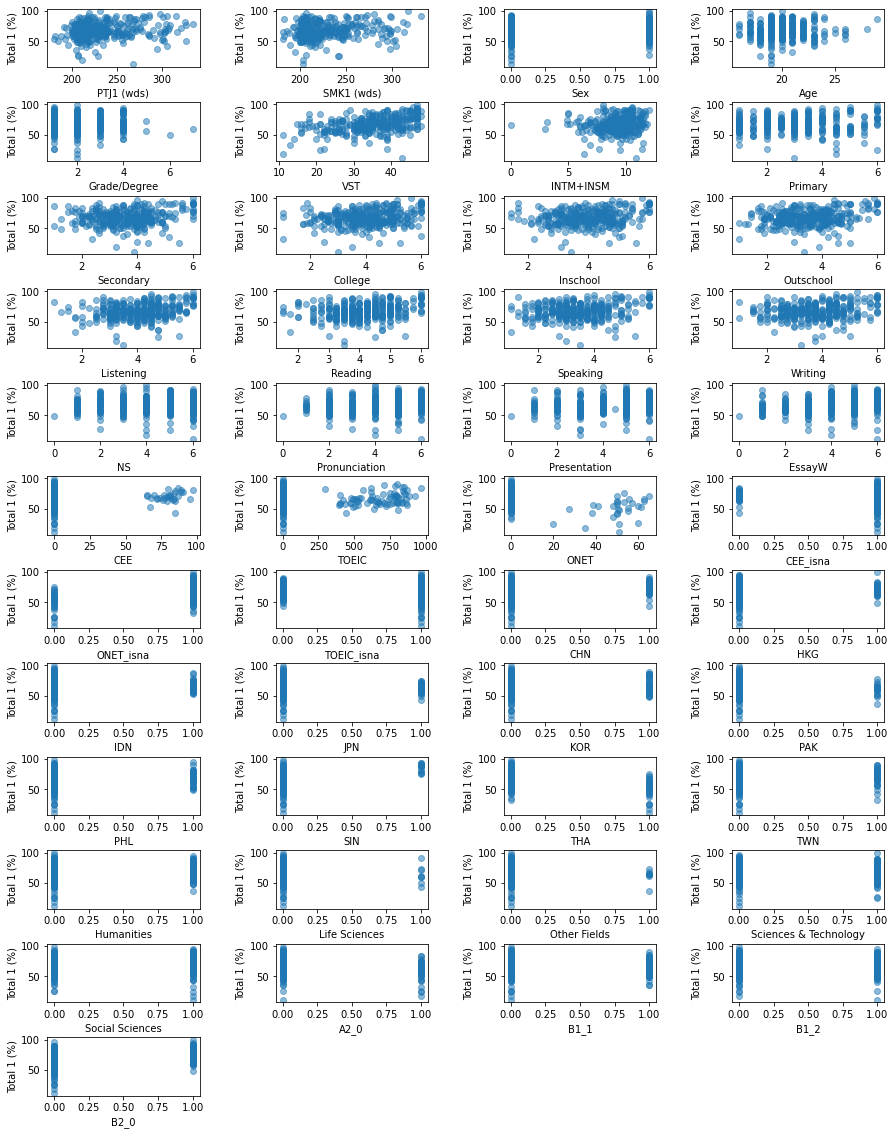

In [17]:
# EDA - plotted
scatterplots(columns = X.columns, y_col = 'Total 1 (%)', data = df, ncol=4, figsize=(15,20))

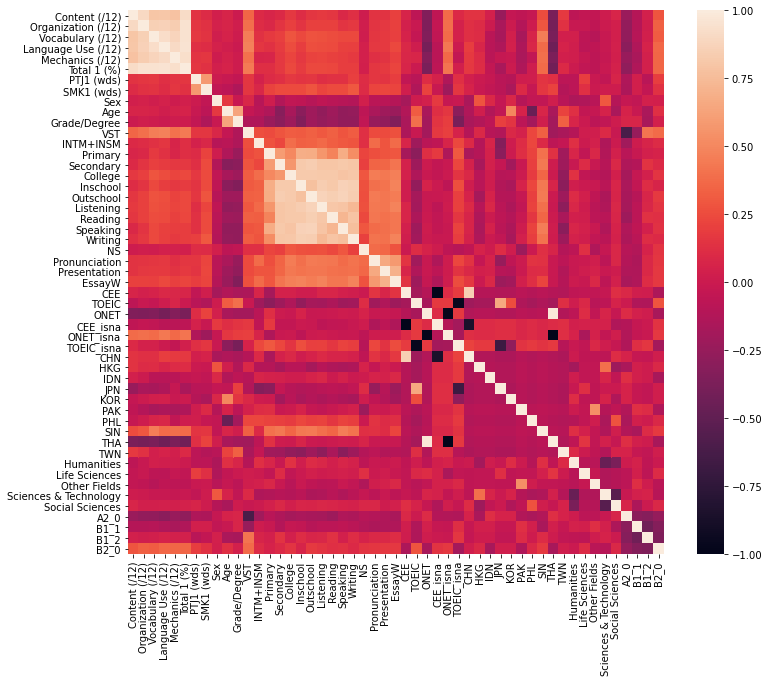

In [20]:
# Also EDA - heatmap
_ = plt.subplots(figsize=(12,10))
_ = sns.heatmap(df.corr())

In [25]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
X = sm.add_constant(X)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(type(X_train), type(X_test), type(y_train), type(y_test))

(240, 45) (81, 45) (240,) (81,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [27]:
# First model - multivariate linear regression
OLSmodel = sm.OLS(y_train, X_train)
rModel = OLSmodel.fit()
rModel.params

PTJ1 (wds)                -0.011314
SMK1 (wds)                 0.068380
Sex                        1.039583
Age                       -0.967838
Grade/Degree               0.004667
VST                        0.212977
INTM+INSM                 -0.554962
Primary                  -24.511683
Secondary                -65.080204
College                  -61.084868
Inschool                 114.479684
Outschool                113.887259
Listening                -17.228786
Reading                  -19.287738
Speaking                 -20.470134
Writing                  -19.671953
NS                        -0.495721
Pronunciation             -1.082022
Presentation               0.033120
EssayW                     1.014268
CEE                        0.235894
TOEIC                      0.003040
ONET                       0.642048
CEE_isna                  24.198370
ONET_isna                 34.971572
TOEIC_isna                 0.314083
CHN                       11.106077
HKG                        3

In [28]:
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     5.716
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           2.08e-17
Time:                        11:10:34   Log-Likelihood:                -864.57
No. Observations:                 240   AIC:                             1813.
Df Residuals:                     198   BIC:                             1959.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
PTJ1 (wds)               -0.0113      0.028     -0.401      0.689      -0.067       0.044
SMK1 (wds)                0.0684      0.029      2.335      0.021       0.011       0.126
Sex                       1.0396      1.556      0.668      0.505      -2.029       4.109
Age                      -0.9678      0.645     -1.500      0.135      -2.240       0.305
Grade/Degree              0.0047      0.943      0.005      0.996      -1.855       1.864
VST                       0.2130      0.156      1.363      0.174      -0.095       0.521
INTM+INSM                -0.5550      0.511     -1.086      0.279      -1.563       0.453
Primary                 -24.5117     35.839     -0.684      0.495     -95.187      46.163
Secondary               -65.0802     65.711     -0.990      0.323    -194.663      64.502
College                 -61.0849     65.641     -0.931      0.353    -190.529      68.360
Inschool                114.4797    161.295      0.710      0.479    -203.597     432.557
Outschool               113.8873    161.053      0.707      0.480    -203.712     431.486
Listening               -17.2288     60.965     -0.283      0.778    -137.453     102.996
Reading                 -19.2877     61.121     -0.316      0.753    -139.820     101.245
Speaking                -20.4701     60.939     -0.336      0.737    -140.644      99.703
Writing                 -19.6720     60.706     -0.324      0.746    -139.385     100.041
NS                       -0.4957      0.520     -0.953      0.342      -1.522       0.530
Pronunciation            -1.0820      0.712     -1.519      0.130      -2.487       0.322
Presentation              0.0331      0.708      0.047      0.963      -1.363       1.429
EssayW                    1.0143      0.778      1.304      0.194      -0.520       2.549
CEE                       0.2359      0.283      0.833      0.406      -0.322       0.794
TOEIC                     0.0030      0.013      0.235      0.814      -0.022       0.029
ONET                      0.6420      0.253      2.539      0.012       0.143       1.141
CEE_isna                 24.1984     23.412      1.034      0.303     -21.971      70.368
ONET_isna                34.9716     14.194      2.464      0.015       6.981      62.962
TOEIC_isna                0.3141      9.053      0.035      0.972     -17.539      18.167
CHN                      11.1061      3.718      2.987      0.003       3.774      18.438
HKG                       3.9254      3.019      1.300      0.195      -2.028       9.878
IDN                      -0.4574      2.947     -0.155      0.877      -6.268       5.353
JPN                      -5.0926      3.530     -1.443      0.151     -12.053       1.868
KOR                       4.9777      3.316      1.501      0.135      -1.561      11.516
PAK                    

In [29]:
# Training prediction for OLS multi-linreg
y_tr_pred = rModel.predict(X_train)
y_tr_pred

319    79.040610
312    67.384151
91     63.194441
80     65.256435
262    40.230466
         ...    
252    42.491613
17     66.527745
56     65.710484
71     63.490783
260    57.567861
Length: 240, dtype: float64

In [30]:
# Test prediction for OLS multi-linreg
y_te_pred = rModel.predict(X_test)
y_te_pred

306    67.373545
228    73.132842
296    71.621896
59     78.789462
215    64.341771
         ...    
245    89.318267
34     77.622836
11     79.981129
235    96.896963
47     66.699656
Length: 81, dtype: float64

In [31]:
# For plotting performance of model versus actual
def pred_plot(y_pred, y_act, figsize=(8,6)):
    sns.set()
    fig, ax = plt.subplots(figsize=(8,6))

    ax.scatter(y_pred, y_act, color='b', label='predicted')
    ax.plot(y_act, y_act, marker='.', linestyle='-', color='r', label='perfect "model"')

    ax.set_xlabel('predicted')
    ax.set_ylabel('actual')
    ax.legend()

    plt.show()

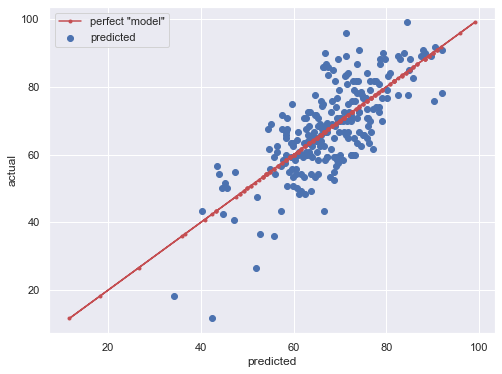

In [32]:
# Training set performance
pred_plot(y_tr_pred, y_train)

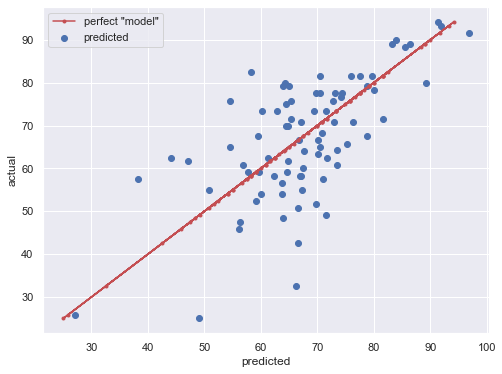

In [33]:
# Test set performance
pred_plot(y_te_pred, y_test)

In [34]:
# R^2 scores
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.5420350396103202, 0.4160080178248078)

In [35]:
# Pipeline for linear regression, for selecting best number of features to feed into linreg
pipe = make_pipeline(SelectKBest(f_regression), LinearRegression())

In [36]:
# For displaying CV result statistics
def cv_score_summary(cv_results):
    cv_scores = cv_results['test_score']
    print("CV scores are: ", cv_scores)
    print("Mean and std CV scores: ", np.mean(cv_scores), np.std(cv_scores))
    print("95% confidence interval for CV scores: ", 
          np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2))

In [37]:
# 5-fold CV, cross-validation scores
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [38]:
cv_score_summary(cv_results)

CV scores are:  [0.20461441 0.48406336 0.40110609 0.29946514 0.09775343]
Mean and std CV scores:  0.29740048633720206 0.13716438827662025
95% confidence interval for CV scores:  [0.02 0.57]


In [39]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'linearregression', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [40]:
# Set up for selecting best number of variables for linreg
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [41]:
# 5-fold CV Grid Search re: number of independent variables
lr_grid_cv = GridSearchCV(pipe, param_grid = grid_params, cv=5, n_jobs=-1)

In [42]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002DBEB594D30>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [43]:
# Grid Search summary stats
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [44]:
# Best number of k's
lr_grid_cv.best_params_

{'selectkbest__k': 10}

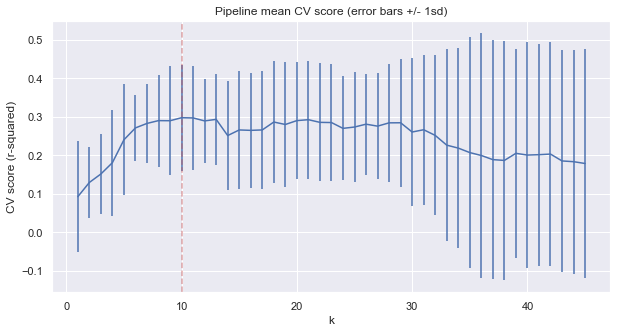

In [45]:
# Visually plotting best number of k's
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [46]:
# Optimal columns for best linreg fit: selected
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
X_train.columns[selected]

Index(['VST', 'EssayW', 'ONET', 'ONET_isna', 'JPN', 'SIN', 'THA', 'TWN',
       'A2_0', 'B2_0'],
      dtype='object')

In [47]:
# Coefficients of regression: coefs; column names: features
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

ONET_isna    22.210214
SIN          13.678991
B2_0          6.107617
TWN           5.799776
ONET          0.555309
EssayW        0.536261
VST           0.178257
A2_0         -0.474531
JPN          -6.351269
THA         -22.210214
dtype: float64

In [48]:
# Subset training and testing sets for columns of interest
X_train_lr = X_train[features]
X_test_lr = X_test[features]

In [49]:
# Define the optimized linreg model with four features
OLSmodel_lr = sm.OLS(y_train, X_train_lr)
lr_model = OLSmodel_lr.fit()
lr_model.params

VST           0.178257
EssayW        0.536261
ONET          0.555309
ONET_isna    59.147404
JPN          -6.351269
SIN          13.678991
THA          14.726977
TWN           5.799776
A2_0         -0.474531
B2_0          6.107617
dtype: float64

In [50]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     18.95
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.55e-23
Time:                        11:11:46   Log-Likelihood:                -891.72
No. Observations:                 240   AIC:                             1803.
Df Residuals:                     230   BIC:                             1838.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VST            0.1783      0.115      1.551      0.122      -0.048       0.405
EssayW         0.5363      0.503      1.067      0.287      -0.454       1.527
ONET           0.5553      0.234      2.369      0.019       0.094       1.017
ONET_isna     59.1474      4.639     12.750      0.000      50.007      68.288
JPN           -6.3513      2.056     -3.090      0.002     -10.402      -2.301
SIN           13.6790      3.116      4.389      0.000       7.539      19.819
THA           14.7270     12.550      1.173      0.242     -10.000      39.454
TWN            5.7998      2.101      2.760      0.006       1.660       9.940
A2_0          -0.4745      2.160     -0.220      0.826      -4.731       3.782
B2_0           6.1076      1.777      3.437      0.001       2.607       9.609
==============================================================================
Omnibus:                       13.170   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.088
Skew:                          -0.329   Prob(JB):                     2.64e-05
Kurtosis:                       4.295   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Predict training set
y_tr_lr_pred = lr_model.predict(X_train_lr)
y_tr_lr_pred

319    79.438847
312    68.752313
91     67.529963
80     66.103905
262    46.658534
         ...    
252    53.930356
17     67.708220
56     66.458930
71     66.638677
260    45.762779
Length: 240, dtype: float64

In [52]:
y_te_lr_pred = lr_model.predict(X_test_lr)
y_te_lr_pred

306    70.654391
228    74.705634
296    67.506002
59     75.244875
215    67.531453
         ...    
245    90.529671
34     74.175332
11     68.067714
235    89.993409
47     72.566548
Length: 81, dtype: float64

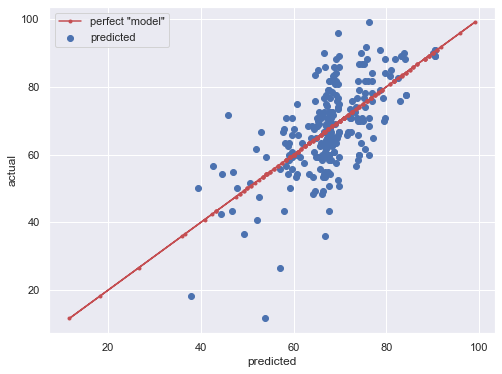

In [53]:
# Training set performance
pred_plot(y_tr_lr_pred, y_train)

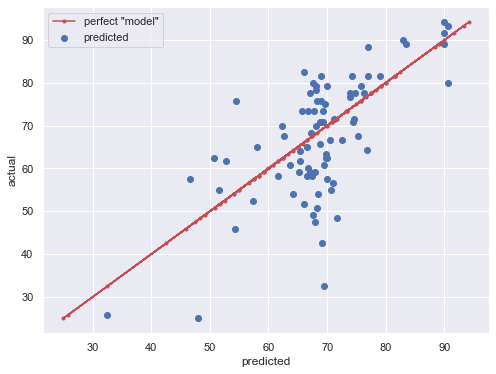

In [54]:
# Testing set performance
pred_plot(y_te_lr_pred, y_test)

In [55]:
r2_score(y_train, y_tr_lr_pred), r2_score(y_test, y_te_lr_pred)

(0.4257933195829796, 0.43657298896866203)

In [59]:
rf_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

In [60]:
# Define grid number of estimators: grid_params
grid_params = { 'randomforestregressor__n_estimators': [int(n) for n in np.logspace(start=1, stop=3, num=20)],
                'randomforestregressor__max_features': [k+1 for k in range(len(X_train.columns))],  
                'standardscaler': [StandardScaler(), None] }
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'randomforestregressor__max_features': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 'standardscaler': [StandardScaler(), None]}

In [62]:
# 5-fold CV Grid Search with # of estimators
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [63]:
# Fit with training set
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': [1, 2, 3, 4, 5,
                                                                 6, 7, 8, 9, 10,
                                                                 11, 12, 13, 14,
                                                                 15, 16, 17, 18,
                                                                 19, 20, 21, 22,
                                                                 23, 24, 25, 26,
                                                                 27, 28, 29, 30, ...],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
             

In [64]:
# Best number of estimators
rf_grid_cv.best_params_

{'randomforestregressor__max_features': 19,
 'randomforestregressor__n_estimators': 69,
 'standardscaler': None}

In [65]:
# 5-fold CV with optimal number of estimators in Random Forest
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)

In [66]:
rf_best_cv_results

{'fit_time': array([0.09677029, 0.07833576, 0.0767951 , 0.07779145, 0.07875276]),
 'score_time': array([0.00496197, 0.00495076, 0.00501895, 0.00499105, 0.00498652]),
 'test_score': array([0.31062963, 0.42782854, 0.37163447, 0.28845124, 0.23759139])}

In [67]:
# Summary statistics for RF model
cv_score_summary(rf_best_cv_results)

CV scores are:  [0.31062963 0.42782854 0.37163447 0.28845124 0.23759139]
Mean and std CV scores:  0.3272270552100223 0.06619103982392753
95% confidence interval for CV scores:  [0.19 0.46]


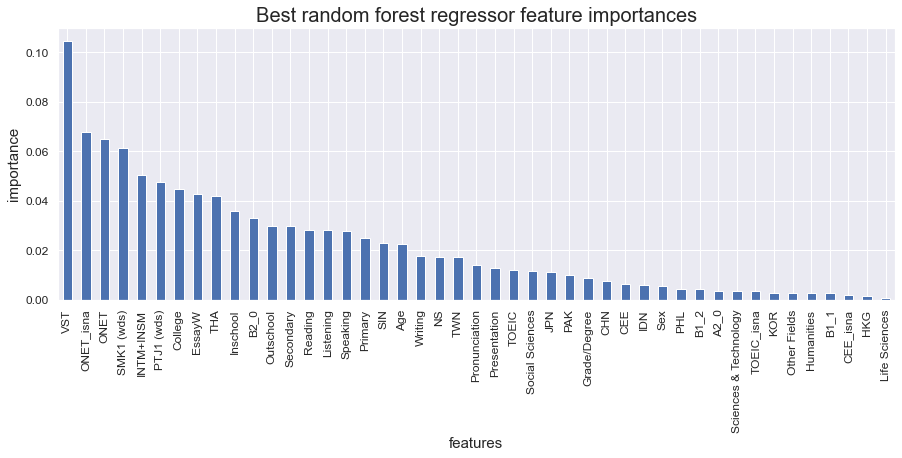

In [68]:
# Plot importance of features
plt.subplots(figsize=(15, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar', fontsize=12)
plt.xlabel('features', fontsize=15)
plt.ylabel('importance', fontsize=15)
plt.title('Best random forest regressor feature importances', fontsize=20);

In [69]:
# Predictions for training and test sets
y_tr_rf_pred = rf_grid_cv.best_estimator_.predict(X_train)
y_te_rf_pred = rf_grid_cv.best_estimator_.predict(X_test)

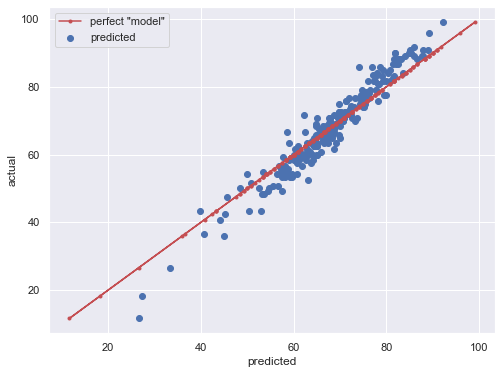

In [70]:
# Plot Training set results. Very nicely fitted - much better than linreg.
pred_plot(y_tr_rf_pred, y_train)

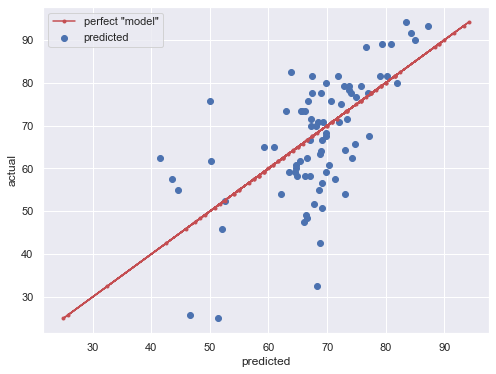

In [71]:
# Plot testing set results. Much worse performance in the testing set, not much better than linreg. 
# Very overfitted. May just need more data, or more optimization of (or fewer) parameters.
pred_plot(y_te_rf_pred, y_test)

In [72]:
print("Random Forest Model: ")
print("R^2: ", r2_score(y_test, y_te_rf_pred))
print("RMSE: ", (mean_squared_error(y_test, y_te_rf_pred)) ** 0.5)

Random Forest Model: 
R^2:  0.3659721389146344
RMSE:  11.250717259385773


In [73]:
print("Linear Regression Model (k-regression): ")
print("R^2: ", r2_score(y_test, y_te_lr_pred))
print("RMSE: ", (mean_squared_error(y_test, y_te_lr_pred)) ** 0.5)

Linear Regression Model (k-regression): 
R^2:  0.43657298896866203
RMSE:  10.60583511711975


In [74]:
print("Linear Regression Model (all variables): ")
print("R^2: ", r2_score(y_test, y_te_pred))
print("RMSE: ", (mean_squared_error(y_test, y_te_pred)) ** 0.5)

Linear Regression Model (all variables): 
R^2:  0.4160080178248078
RMSE:  10.79765586028969
